In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv('final.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12999 non-null  int64  
 1   uuid                12999 non-null  object 
 2   ord_in_thread       12999 non-null  int64  
 3   author              10575 non-null  object 
 4   published           12999 non-null  object 
 5   title               12319 non-null  object 
 6   text                12953 non-null  object 
 7   language            12999 non-null  object 
 8   crawled             12999 non-null  object 
 9   site_url            12999 non-null  object 
 10  country             12823 non-null  object 
 11  domain_rank         8776 non-null   float64
 12  thread_title        12987 non-null  object 
 13  spam_score          12999 non-null  float64
 14  main_img_url        9356 non-null   object 
 15  replies_count       12999 non-null  int64  
 16  part

In [5]:
df.head()

,Unnamed: 0,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,label
0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,...,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,0
1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,...,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,0
2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,...,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1
3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,0
4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,0


In [6]:
fake_df = df[df['label']==0].dropna()
true_df = df[df['label']==1].dropna()

In [7]:
# Missing Values

In [8]:
fake_df.isna().sum()

Unnamed: 0            0
uuid                  0
ord_in_thread         0
author                0
published             0
title                 0
text                  0
language              0
crawled               0
site_url              0
country               0
domain_rank           0
thread_title          0
spam_score            0
main_img_url          0
replies_count         0
participants_count    0
likes                 0
comments              0
shares                0
type                  0
label                 0
dtype: int64

In [9]:
true_df.isna().sum()

Unnamed: 0            0
uuid                  0
ord_in_thread         0
author                0
published             0
title                 0
text                  0
language              0
crawled               0
site_url              0
country               0
domain_rank           0
thread_title          0
spam_score            0
main_img_url          0
replies_count         0
participants_count    0
likes                 0
comments              0
shares                0
type                  0
label                 0
dtype: int64

In [10]:
# 0. Correlation

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
fake_num = fake_df.select_dtypes(include=numerics).drop(columns=['Unnamed: 0','ord_in_thread', 'label'])
true_num = true_df.select_dtypes(include=numerics).drop(columns=['Unnamed: 0','ord_in_thread', 'label'])

In [12]:
fig = plt.figure(figsize = (18, 9))
corr1 = fake_num.corr()
corr1.style.background_gradient(cmap='coolwarm')

,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
domain_rank,1.000000,0.004081,-0.023664,-0.038385,-0.210091,-0.105774,-0.210091
spam_score,0.004081,1.000000,0.002628,-0.344385,-0.001905,-0.010838,-0.001905
replies_count,-0.023664,0.002628,1.000000,0.816526,-0.002172,-0.001816,-0.002172
participants_count,-0.038385,-0.344385,0.816526,1.000000,0.006739,0.003883,0.006739
likes,-0.210091,-0.001905,-0.002172,0.006739,1.000000,0.340908,1.000000
comments,-0.105774,-0.010838,-0.001816,0.003883,0.340908,1.000000,0.340908
shares,-0.210091,-0.001905,-0.002172,0.006739,1.000000,0.340908,1.000000


<Figure size 1296x648 with 0 Axes>

In [13]:
fig = plt.figure(figsize = (18, 9))
corr2 = true_num.corr()
corr2.style.background_gradient(cmap='coolwarm')

,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
domain_rank,1.000000,0.027918,-0.058028,-0.095051,-0.262462,-0.025052,-0.262462
spam_score,0.027918,1.000000,0.086801,-0.292043,-0.014134,-0.003902,-0.014134
replies_count,-0.058028,0.086801,1.000000,0.705777,0.079455,-0.001668,0.079455
participants_count,-0.095051,-0.292043,0.705777,1.000000,0.085690,0.002512,0.085690
likes,-0.262462,-0.014134,0.079455,0.085690,1.000000,0.014203,1.000000
comments,-0.025052,-0.003902,-0.001668,0.002512,0.014203,1.000000,0.014203
shares,-0.262462,-0.014134,0.079455,0.085690,1.000000,0.014203,1.000000


<Figure size 1296x648 with 0 Axes>

In [14]:
# 1. Top 5 Authors Information

In [7]:
fake_authors = fake_df.author.value_counts().keys()[:5]
fake_authors_counts = fake_df.author.value_counts()[:5]
true_authors = true_df.author.value_counts().keys()[:5]
true_authors_counts = true_df.author.value_counts()[:5]

In [8]:
fake_authors

Index(['admin', 'EdJenner', 'Eddy Lavine',
       'noreply@blogger.com (Alexander Light)', 'BareNakedIslam'],
      dtype='object')

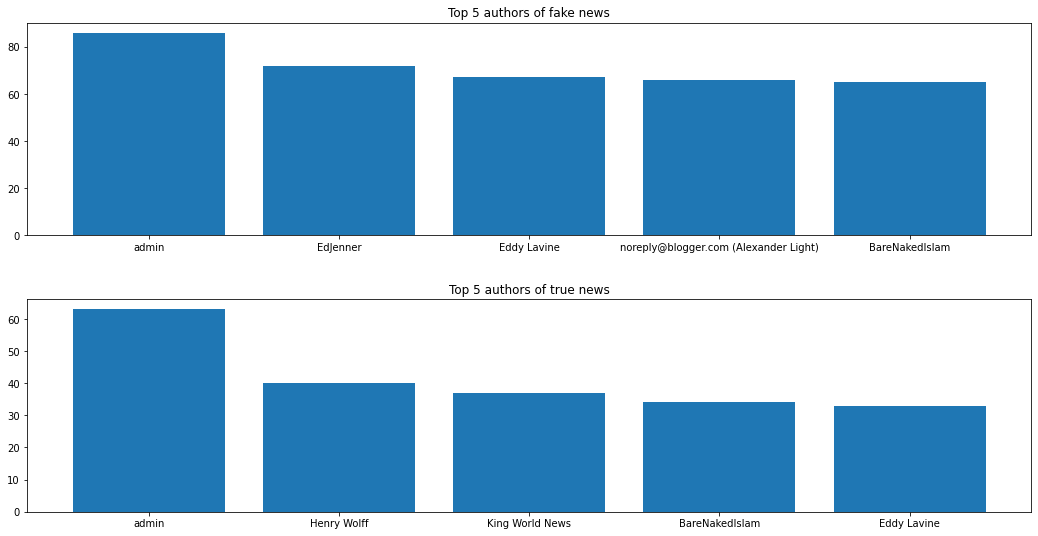

In [16]:
fig = plt.figure(figsize = (18, 9))
plt.subplot(2,1,1)
plt.bar(fake_authors, fake_authors_counts)
plt.title('Top 5 authors of fake news')
plt.subplot(2,1,2)
plt.bar(true_authors, true_authors_counts)
plt.title('Top 5 authors of true news')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)
plt.savefig('authors.jpg')

In [17]:
# 2. Top 5 site_url

In [9]:
fake_site_url = fake_df.site_url.value_counts().keys()[:5]
fake_site_url_counts = fake_df.site_url.value_counts()[:5]
true_site_url = true_df.site_url.value_counts().keys()[:5]
true_site_url_counts = true_df.site_url.value_counts()[:5]

In [10]:
fake_site_url

Index(['conservativetribune.com', 'occupydemocrats.com',
       'waterfordwhispersnews.com', 'ihavethetruth.com', 'thepoke.co.uk'],
      dtype='object')

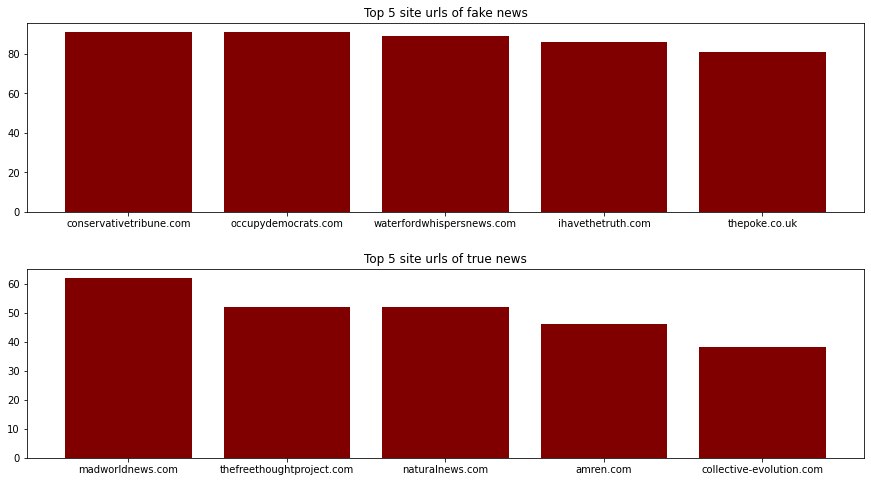

In [19]:
fig = plt.figure(figsize = (15, 8))
plt.subplot(2,1,1)
plt.bar(fake_site_url, fake_site_url_counts, color = 'maroon')
plt.title('Top 5 site urls of fake news')
plt.subplot(2,1,2)
plt.bar(true_site_url, true_site_url_counts, color = 'maroon')
plt.title('Top 5 site urls of true news')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.3)
plt.savefig('urls.jpg')

In [20]:
# 3. Publish Countries

In [11]:
fake_df.country.value_counts()

US    2574
GB     205
TV      68
RU      46
EU      16
IN       9
FR       3
CA       2
CO       1
Name: country, dtype: int64

In [12]:
true_df.country.value_counts()

US    1272
GB      91
RU      34
TV      33
IN      13
EU       2
NL       2
Name: country, dtype: int64

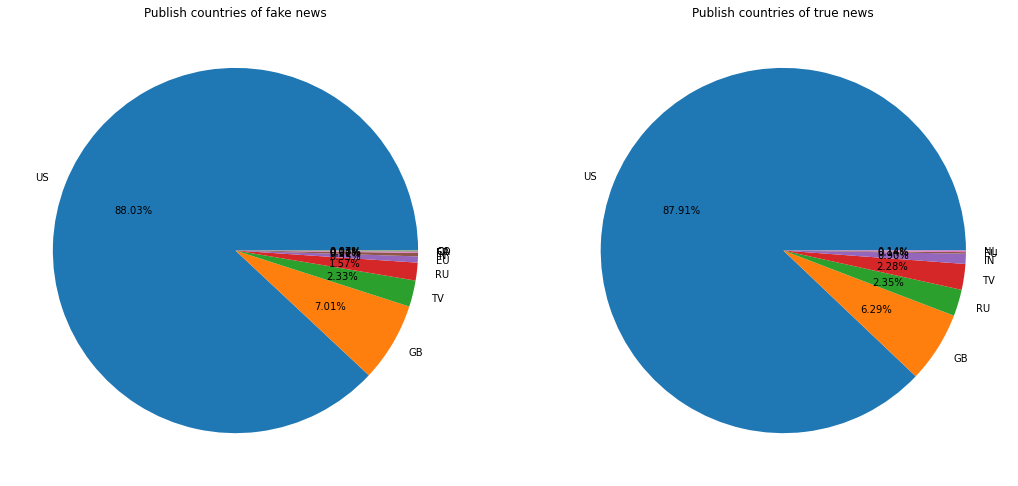

In [21]:
fig = plt.figure(figsize = (18, 9))
plt.subplot(1,2,1)
plt.title('Publish countries of fake news',size = 12)
plt.pie(fake_df.country.value_counts(), labels=list(fake_df.country.value_counts().keys()),autopct='%.2f%%');
plt.subplot(1,2,2)
plt.title('Publish countries of true news',size = 12)
plt.pie(true_df.country.value_counts(), labels=list(true_df.country.value_counts().keys()),autopct='%.2f%%');
plt.savefig('countries.jpg')

In [22]:
# 4. Participants, Comments, Shares & Likes

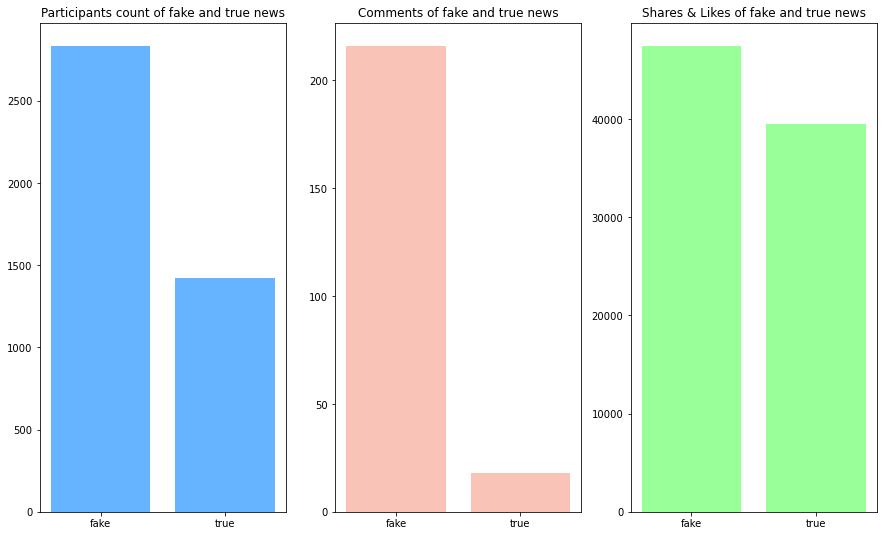

In [23]:
fig = plt.figure(figsize = (15, 9))
plt.subplot(1,3,1)
plt.bar(['fake', 'true'], [sum(fake_df.participants_count),sum(true_df.participants_count)], color='#66b3ff')
plt.title('Participants count of fake and true news')
plt.subplot(1,3,2)
plt.bar(['fake', 'true'], [sum(fake_df.comments),sum(true_df.comments)], color='#f9c3b7')
plt.title('Comments of fake and true news')
plt.subplot(1,3,3)
plt.bar(['fake', 'true'], [sum(fake_df.shares),sum(true_df.shares)], color='#99ff99')
plt.title('Shares & Likes of fake and true news')
plt.savefig('Participants-Comments-Shares&Likes.jpg')

In [24]:
# 5. Types of News

In [25]:
true_df.type.value_counts()

bs            1225
bias            70
conspiracy      65
junksci         52
hate            31
state            3
fake             1
Name: type, dtype: int64

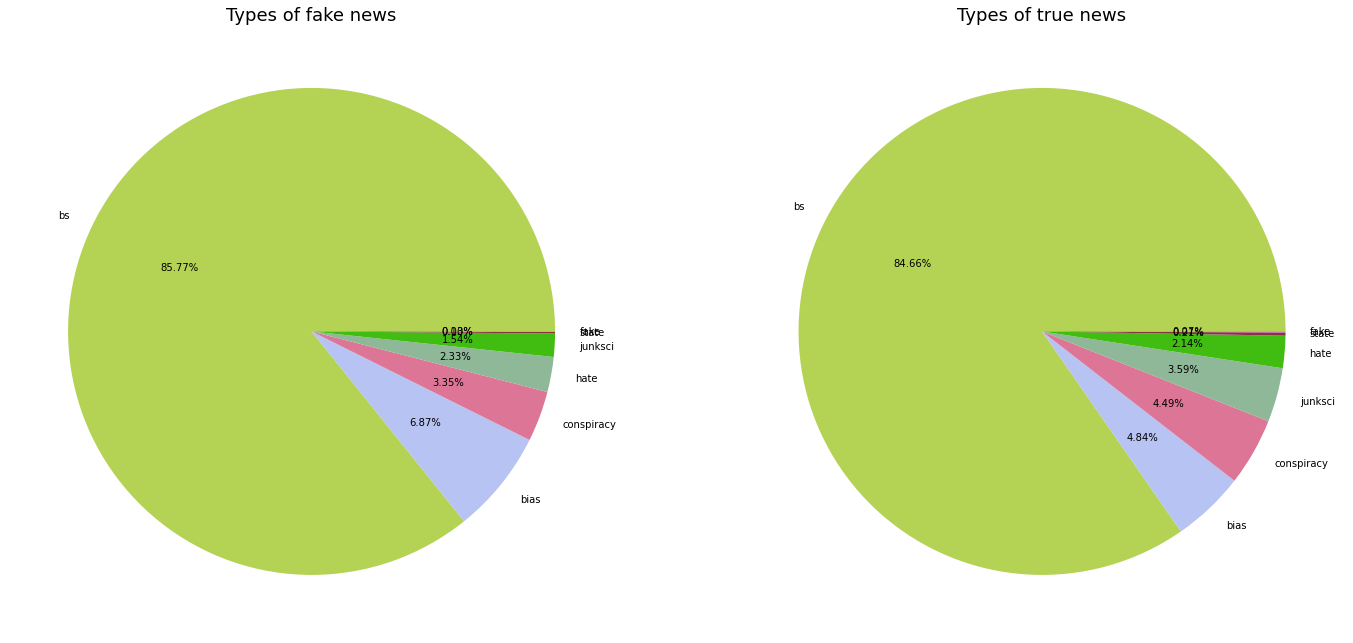

In [26]:
fig = plt.figure(figsize = (24, 15))
colors = ['#B4D253', '#B7C3F3', '#DD7596', '#8EB897', '#41BD12', '#8B3242', '#C763D1', '#52B4BD']
plt.subplot(1,2,1)
plt.title('Types of fake news',size = 18)
plt.pie(fake_df.type.value_counts(), labels=list(fake_df.type.value_counts().keys()),autopct='%.2f%%', colors = colors);
plt.subplot(1,2,2)
plt.title('Types of true news',size = 18)
plt.pie(true_df.type.value_counts(), labels=list(true_df.type.value_counts().keys()),autopct='%.2f%%', colors = colors);
plt.savefig('types.jpg')

In [27]:
# 6. News Title Word Cloud

In [29]:
mask1 = np.array(Image.open("trump2.png"))
mask2 = np.array(Image.open("trump1.png"))

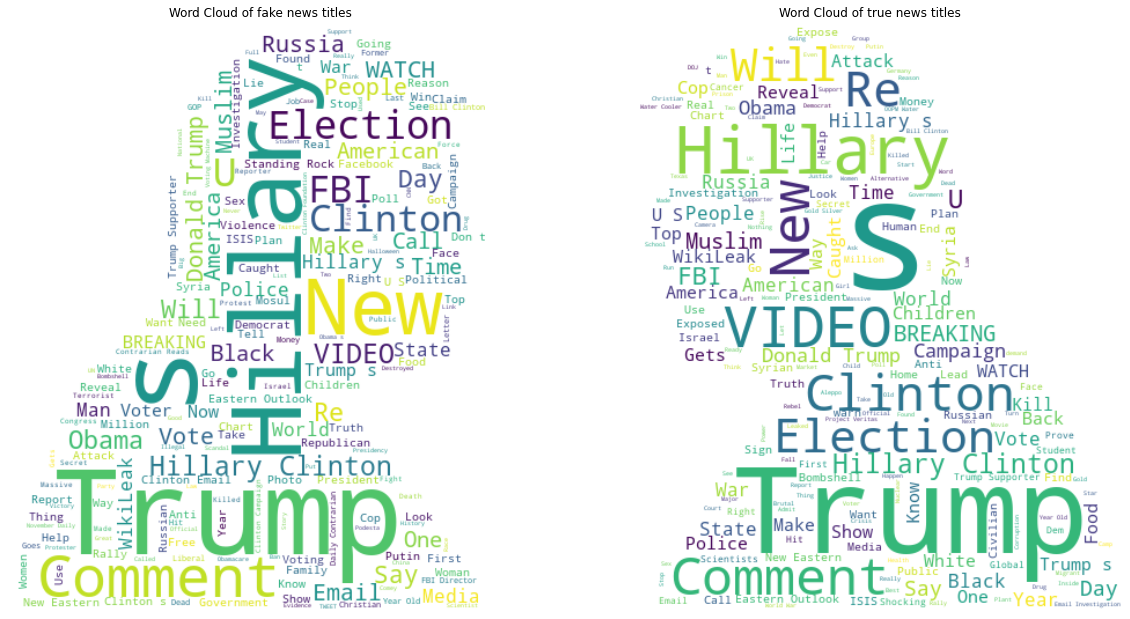

<Figure size 432x288 with 0 Axes>

In [34]:
fig = plt.figure(figsize = (20,12))
title_fake = ','.join(fake_df.title.values)
wordcloud1 = WordCloud(mask=mask1,background_color='white').generate(title_fake)
title_true = ','.join(true_df.title.values)
wordcloud2 = WordCloud(mask=mask2,background_color='white').generate(title_true)
plt.subplot(1,2,1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of fake news titles')
plt.subplot(1,2,2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of true news titles')
plt.show()
plt.savefig('title2.png')

In [29]:
# 7. News Contents Word Cloud

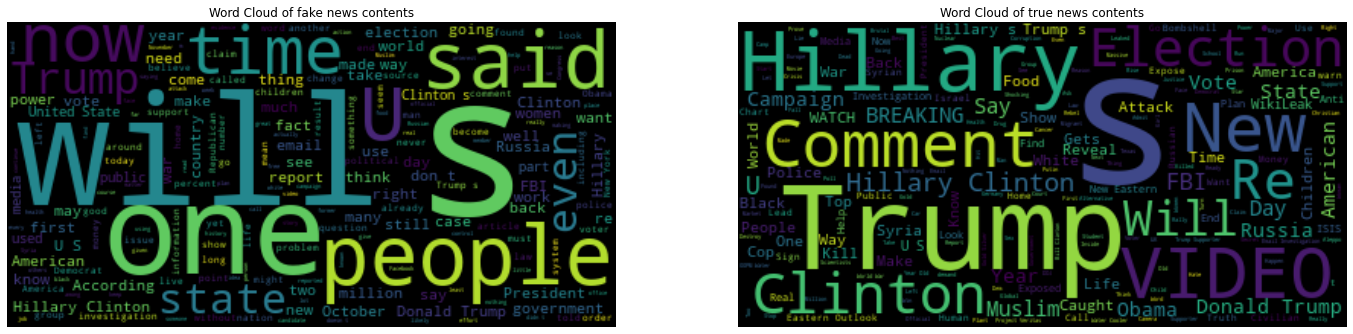

<Figure size 432x288 with 0 Axes>

In [30]:
fig = plt.figure(figsize = (24,15))
text_fake = ','.join(fake_df.text.values)
wordcloud1 = WordCloud().generate(text_fake)
text_true = ','.join(true_df.title.values)
wordcloud2 = WordCloud().generate(text_true)
plt.subplot(1,2,1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of fake news contents')
plt.subplot(1,2,2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of true news contents')
plt.show()
plt.savefig('contents.jpg')